# Exploring Data Set

Dataset is retrieved from:
https://www.kaggle.com/datasets/uom190346a/global-climate-events-and-economic-impact-dataset?resource=download

In [7]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
import seaborn as sns

## Load data into pd.Dataframe

In [ ]:
data = pd.read_csv('data/data.csv')
print(f"Rows:\t\t{len(data)}")
print(f"Columns:\t{len(data.columns)}")

Rows:		3000
Columns:	20


## Data Exploration

In [9]:
data.head()

,event_id,date,year,month,country,event_type,severity,duration_days,affected_population,deaths,injuries,economic_impact_million_usd,infrastructure_damage_score,response_time_hours,international_aid_million_usd,latitude,longitude,total_casualties,impact_per_capita,aid_percentage
0,EV01539,2020-01-01,2020,1,Japan,Tsunami,1,1,420956,0,2,0.01,4.9,11,0.0,85.4321,138.7206,2,0.02,0.0
1,EV02303,2020-01-01,2020,1,Qatar,Hurricane,1,4,3276,1,10,0.00,3.4,5,0.0,-32.0370,14.0111,11,0.00,0.0
2,EV01796,2020-01-02,2020,1,Canada,Drought,3,6,120382,0,9,0.10,8.9,10,0.0,78.4213,-112.7556,9,0.83,0.0
3,EV00175,2020-01-02,2020,1,Poland,Heatwave,6,16,185527,2,37,1.27,17.8,7,0.0,73.6564,115.0650,39,6.85,0.0
4,EV01115,2020-01-03,2020,1,UAE,Wildfire,4,16,176642,2,27,2.01,18.7,17,0.0,52.6458,101.5023,29,11.38,0.0


In [10]:
data.describe()

,year,month,severity,duration_days,affected_population,deaths,injuries,economic_impact_million_usd,infrastructure_damage_score,response_time_hours,international_aid_million_usd,latitude,longitude,total_casualties,impact_per_capita,aid_percentage
count,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2022.401667,6.260333,3.786333,8.783000,8.685505e+05,4.615000,39.228333,1.944367,15.160733,11.107667,0.057020,-0.053334,-0.133522,43.843333,3.613917,0.009267
std,1.653857,3.367146,2.005165,14.714508,3.009690e+06,11.021491,78.812194,15.734990,11.501826,8.255753,3.005868,51.985637,103.941947,85.943626,10.779860,0.427530
min,2020.000000,1.000000,1.000000,0.000000,6.220000e+02,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,-89.756300,-179.982700,0.000000,0.000000,0.000000
25%,2021.000000,3.000000,2.000000,1.000000,5.451775e+04,1.000000,10.000000,0.010000,6.000000,5.000000,0.000000,-44.905350,-89.849575,11.000000,0.080000,0.000000
50%,2022.000000,6.000000,4.000000,2.000000,1.784770e+05,2.000000,18.000000,0.090000,12.400000,9.000000,0.000000,-1.506450,-0.368500,20.000000,0.480000,0.000000
75%,2024.000000,9.000000,5.000000,9.000000,6.082012e+05,3.000000,27.000000,0.530000,21.425000,15.000000,0.000000,46.775275,93.652275,29.000000,2.132500,0.000000
max,2025.000000,12.000000,9.000000,115.000000,5.624832e+07,117.000000,734.000000,718.210000,63.000000,60.000000,164.510000,89.976900,179.964400,738.000000,181.620000,22.900000


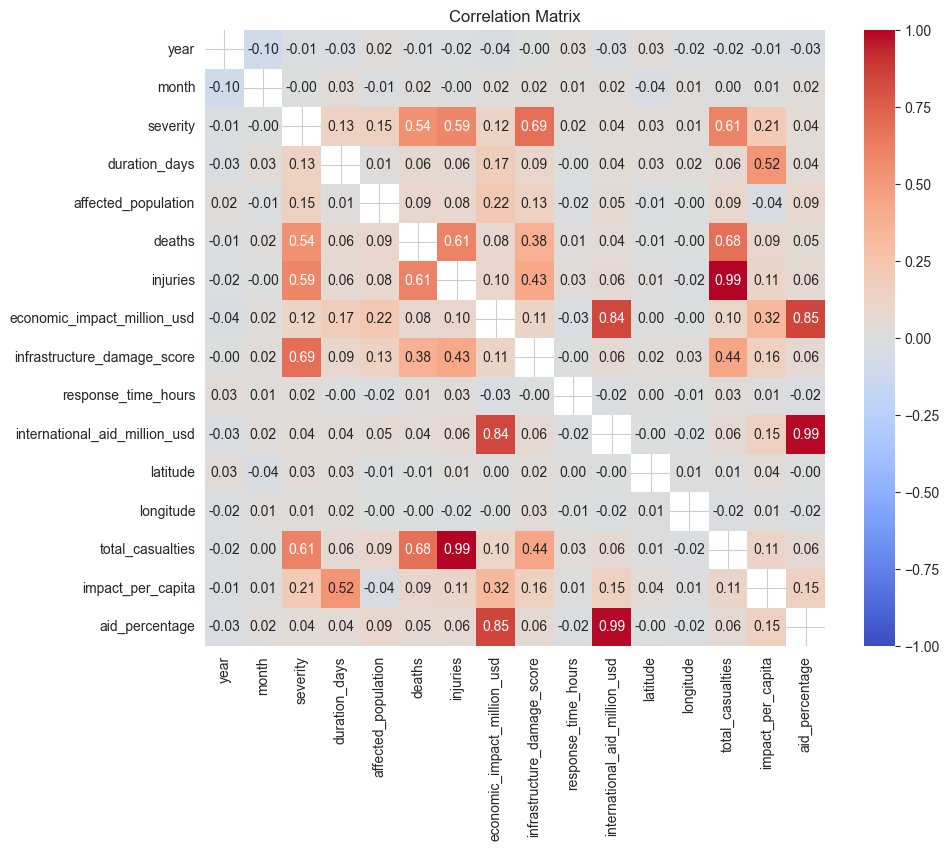

In [11]:
# Create a correlation matrix between the numerical features in data
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
np.fill_diagonal(correlation_matrix.values, np.nan) # ignores diagonal
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

## Some plots

In [13]:
import plotly.express as px

# Count incidents per country
incidents_per_country = data['country'].value_counts().reset_index()
incidents_per_country.columns = ['country', 'count']

# Create world map
fig = px.choropleth(
    incidents_per_country,
    locations='country',
    locationmode='country names',
    color='count',
    color_continuous_scale='YlOrRd',
    title='Number of Climate Incidents per Country'
)

fig.show()

C:\Users\kfrei\AppData\Local\Temp\ipykernel_19008\3781969885.py:8: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


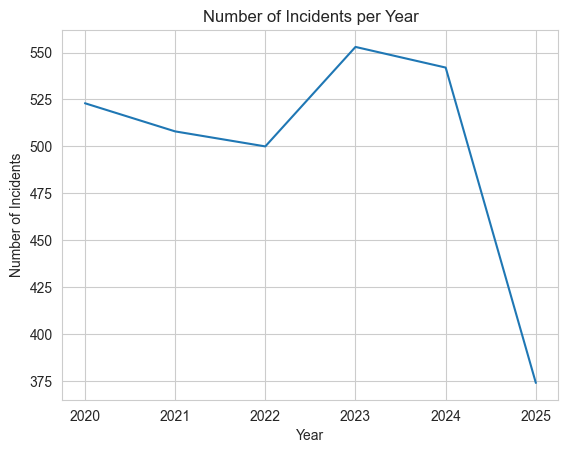

In [38]:
# Trend (by year, not by type of incidence)

data['year'] = pd.to_datetime(data['date']).dt.year
incidents_per_year = data['year'].value_counts().sort_index()

plt.plot(incidents_per_year.index, incidents_per_year.values)
# plt.ylim(ymin=0)
plt.title('Number of Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

<Axes: xlabel='year', ylabel='count'>

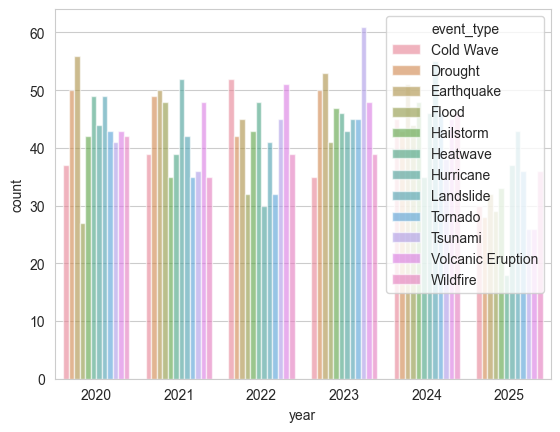

In [45]:
# Trends by type of event

data['year'] = pd.to_datetime(data['date']).dt.year
events_per_year = data.groupby(['year', 'event_type']).size().reset_index(name='count')

sns.barplot(x='year', y='count', hue='event_type', data=events_per_year, alpha=0.6)
# sns.lineplot(x='year', y='count', hue='event_type', data=events_per_year, marker='o')

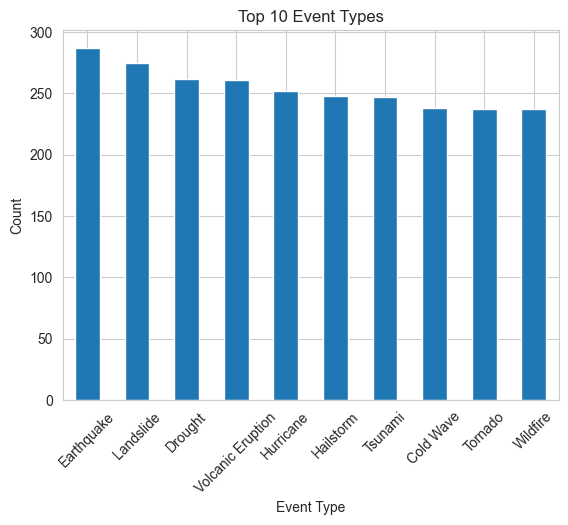

In [24]:
# print(data['event_type'].value_counts())

# Event type counts
data['event_type'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Event Types')
plt.xlabel('Event Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

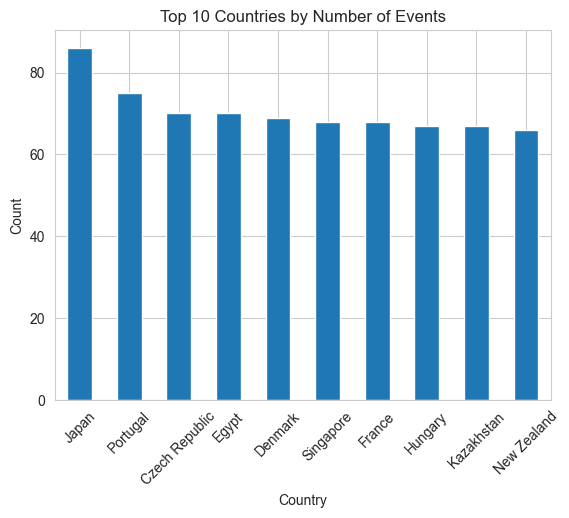

In [25]:
# print(data['country'].value_counts())

# Country counts
data['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Number of Events')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [26]:
# Count and sort combinations by most common
counts = data.groupby(['country', 'event_type']).size().reset_index(name='count')
counts_sorted = counts.sort_values(by='count', ascending=False)
counts_sorted.head(10)

,country,event_type,count
291,Japan,Tornado,15
206,Hungary,Heatwave,12
85,Chile,Earthquake,11
255,Ireland,Tornado,11
425,Portugal,Volcanic Eruption,11
287,Japan,Hailstorm,11
45,Bangladesh,Tsunami,10
313,Malaysia,Hurricane,10
328,Mexico,Tsunami,10
294,Japan,Wildfire,10


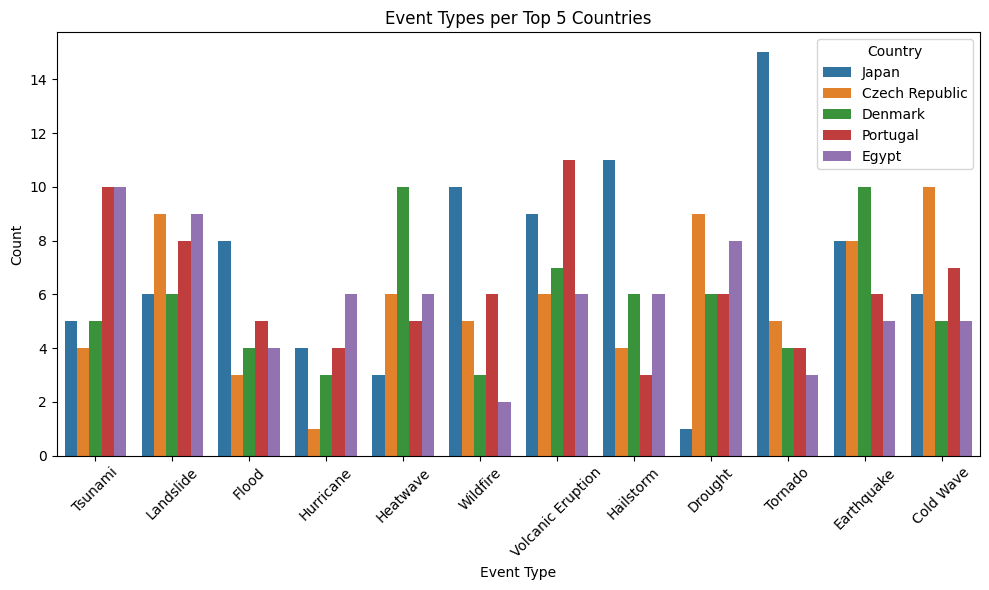

In [9]:
# Bar plot of event types for the top 5 countries
top_countries = data['country'].value_counts().head(5).index
plt.figure(figsize=(10, 6))
sns.countplot(data=data[data['country'].isin(top_countries)], x='event_type', hue='country')
plt.title("Event Types per Top 5 Countries")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

C:\Users\nikic\AppData\Local\Temp\ipykernel_3900\3746488435.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('date').resample('M').size().plot()


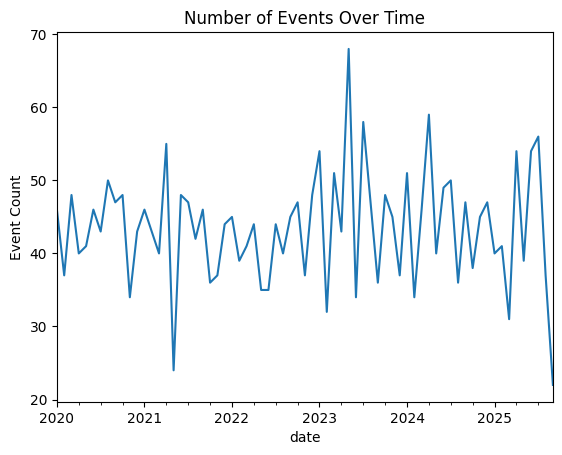

In [10]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date').resample('M').size().plot()
plt.title("Number of Events Over Time")
plt.ylabel("Event Count")
plt.show()

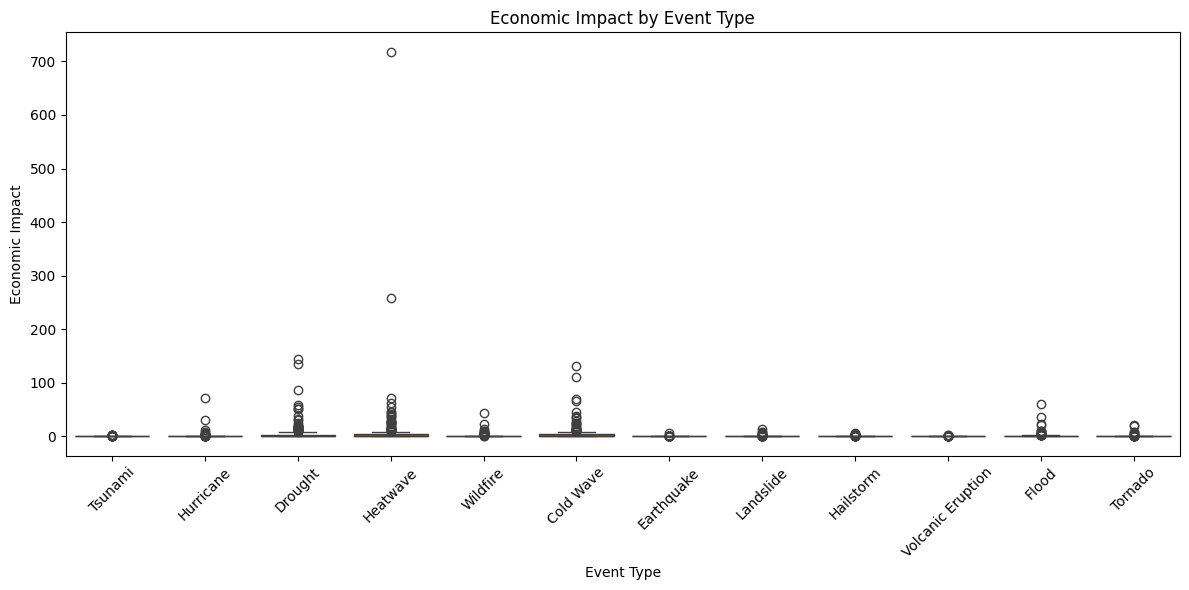

In [11]:
# Boxplot of economic impact by event type
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='event_type', y='economic_impact_million_usd')
plt.title("Economic Impact by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Economic Impact")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

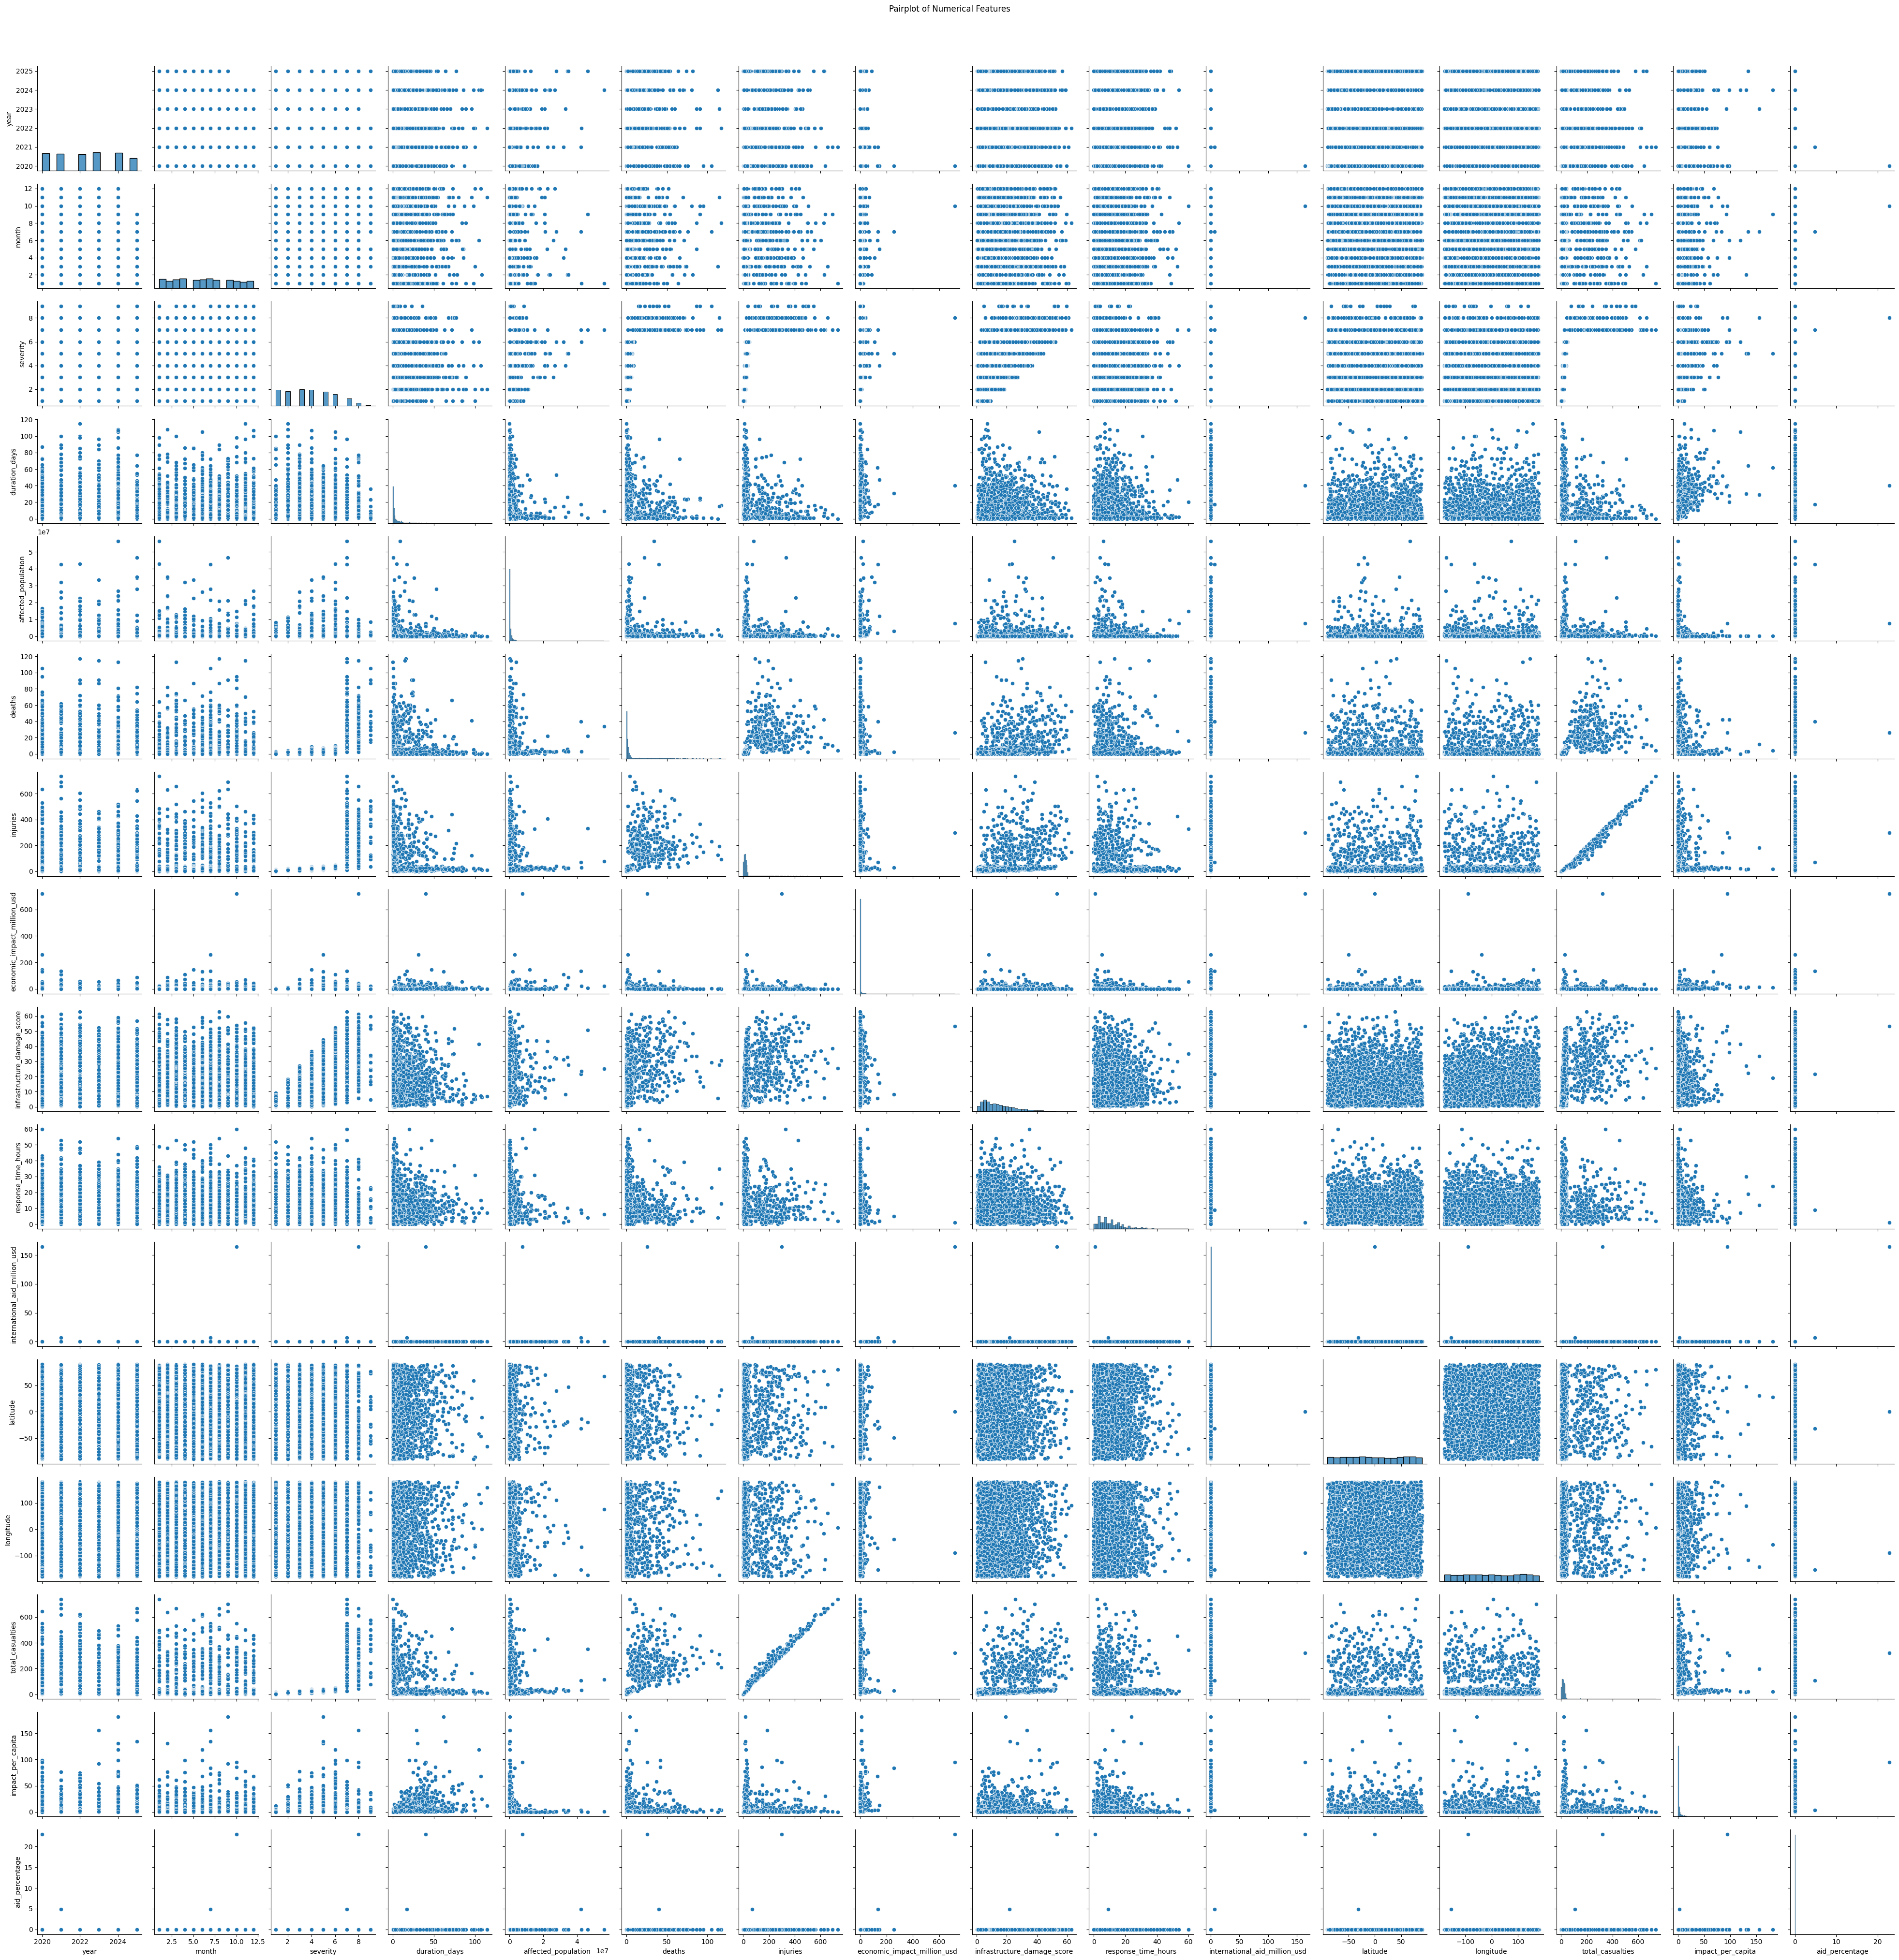

In [12]:
# Pairplot for numerical features
sns.pairplot(data.select_dtypes(include='number'))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

### Politische Entscheidungsträger & Regierungsorganisationen

(z. B. Ministerien für Umwelt, Katastrophenschutz, Stadtplanung)
Interessen/Fragen:

- Welche Länder oder Regionen sind besonders verletzlich und benötigen Priorität bei Anpassungsmaßnahmen?

- Wo übersteigen die wirtschaftlichen Schäden regelmäßig die geleistete internationale Hilfe?

- Welche Länder profitieren von schneller Reaktionszeit, und wo gibt es noch Defizite im Katastrophenschutz?

- Welche Trends lassen sich ableiten, die für zukünftige Investitionen in Infrastruktur wichtig sind?

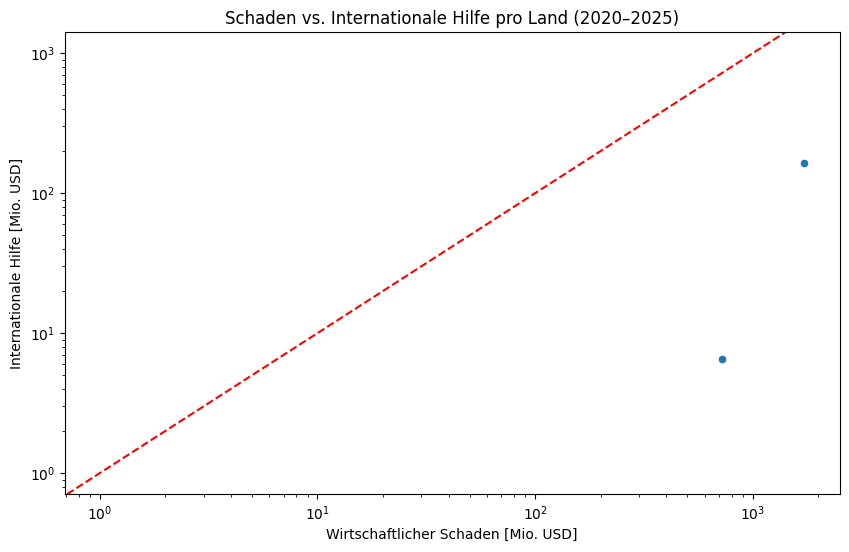

In [13]:
# Durchschnittlicher Schaden und Hilfe pro Land
country_impact = data.groupby("country").agg({
    "economic_impact_million_usd": "sum",
    "international_aid_million_usd": "sum"
}).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=country_impact,
    x="economic_impact_million_usd",
    y="international_aid_million_usd"
)
plt.title("Schaden vs. Internationale Hilfe pro Land (2020–2025)")
plt.xlabel("Wirtschaftlicher Schaden [Mio. USD]")
plt.ylabel("Internationale Hilfe [Mio. USD]")
plt.xscale("log")  # Log-Skala für bessere Lesbarkeit
plt.yscale("log")
plt.axline((1,1),(1000,1000), color="red", linestyle="--")  # Linie Schaden=Hilfe
plt.show()


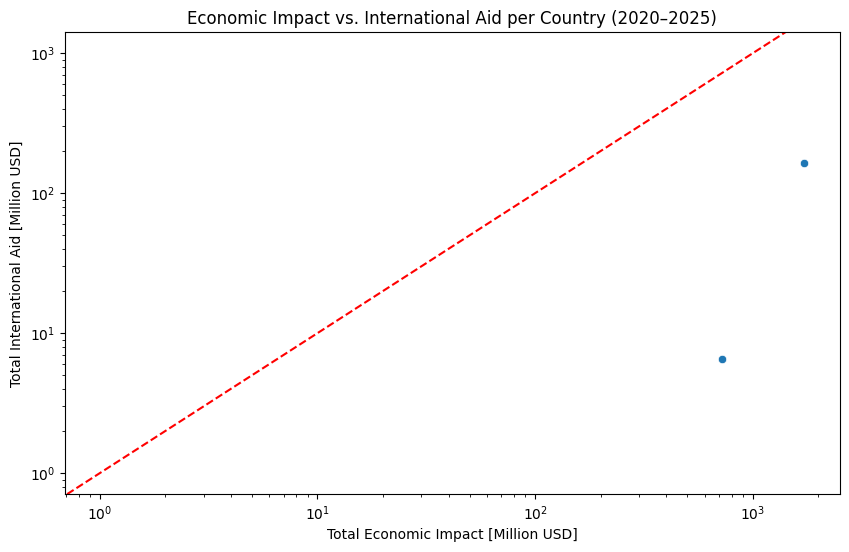

In [16]:
# Aggregate total economic impact and aid by country
country_impact = data.groupby("country").agg({
    "economic_impact_million_usd": "sum",
    "international_aid_million_usd": "sum"
}).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=country_impact,
    x="economic_impact_million_usd",
    y="international_aid_million_usd"
)

# Add reference line (Aid = Impact)
plt.axline((1,1), (1000,1000), color="red", linestyle="--")

plt.title("Economic Impact vs. International Aid per Country (2020–2025)")
plt.xlabel("Total Economic Impact [Million USD]")
plt.ylabel("Total International Aid [Million USD]")
plt.xscale("log")  # Log scale for better readability
plt.yscale("log")
plt.show()


C:\Users\nikic\AppData\Local\Temp\ipykernel_3900\3283465844.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


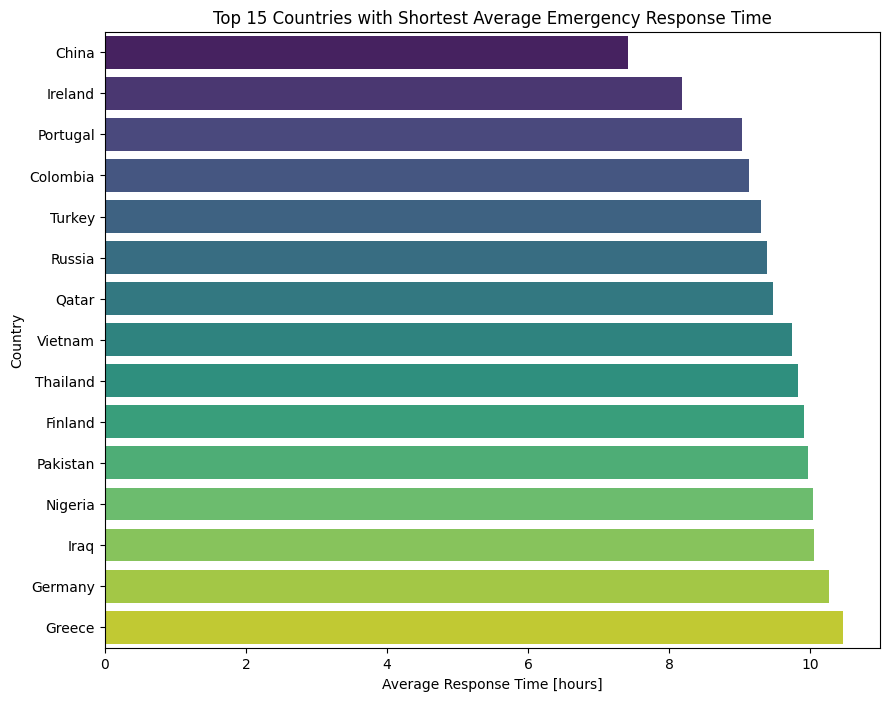

In [17]:
# Calculate mean response time by country
response_times = data.groupby("country")["response_time_hours"].mean().sort_values()

plt.figure(figsize=(10,8))
sns.barplot(
    y=response_times.index[:15], 
    x=response_times.values[:15], 
    palette="viridis"
)

plt.title("Top 15 Countries with Shortest Average Emergency Response Time")
plt.xlabel("Average Response Time [hours]")
plt.ylabel("Country")
plt.show()

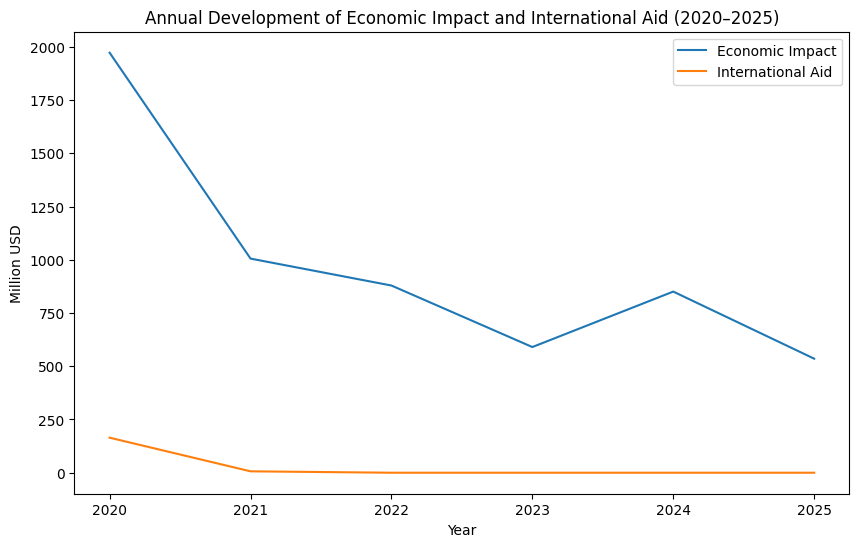

In [ ]:
# Aggregate yearly sums
yearly = data.groupby("year").agg({
    "economic_impact_million_usd": "sum",
    "international_aid_million_usd": "sum"
}).reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly, x="year", y="economic_impact_million_usd", label="Economic Impact")
sns.lineplot(data=yearly, x="year", y="international_aid_million_usd", label="International Aid")

plt.title("Annual Development of Economic Impact and International Aid (2020–2025)")
plt.xlabel("Year")
plt.ylabel("Million USD")
plt.legend()
plt.show()

In [19]:
yearly

,year,economic_impact_million_usd,international_aid_million_usd
0,2020,1972.30,164.51
1,2021,1005.49,6.55
2,2022,879.02,0.00
3,2023,590.17,0.00
4,2024,850.61,0.00
5,2025,535.51,0.00
